# Analysing the $mBasicPH\_storage$ model

## Settings

For working with the model, we first import some packages and the modelclass:

In [1]:
# In case, working directory is not set correctly
#os.chdir('C:\\Users\\mpher\\Documents\\Uni\\Master\\02_Exchange\\01_Academics\\Energy Economics of the Green Transition\\0_Final Project\EnergyEconGroupWork')

In [2]:
import os
current_directory = os.getcwd()
print(current_directory)

c:\Users\mpher\Documents\Uni\Master\02_Exchange\01_Academics\Energy Economics of the Green Transition\EnergyEconGroupWork


In [3]:
%run ./stdPackages.ipynb
from pyDbs import *

os.chdir(os.path.join(d['curr'], 'py'))

from mBasicPH_storage import *
os.chdir(d['curr'])

Next we load the database:

In [4]:
kwargs = {'variables': ['Fundamentals', 'LoadVariables', 'GeneratorsVariables','StorageVariables','TransmissionLines'],
        'maps': ['LoadMaps','GeneratorsMaps','StorageMaps','MarketMaps','hMaps'],
        'variable2D': ['HourlyVariation'],
        'scalars': ['Scalars']}

path_to_data = os.path.join(d['curr'], 'Data', 'mBasicPH_storage_Data.xlsx')

db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

Convert variables to floats:

In [5]:
[db.__setitem__(var,db[var].astype(float).sort_index()) for var in db.getTypes('variable').keys()];

We need to read in heat areas manually:

In [6]:
db['g_H'] = db['id2g_H'].get_level_values('g_H').unique()

In [7]:
db['g_H']

Index(['DK_Central'], dtype='object', name='g_H')

We need to read in electricity areas manually:

In [8]:
db['g_E'] = db['id2g_E'].get_level_values('g_E').unique()

In [9]:
db['g_E']

Index(['DK'], dtype='object', name='g_E')

Collect all areas in one:

In [10]:
db['g'] = db['g_E'].copy()

## Initialze Baseline Model and Debug

In [11]:
m=mSimple(db)
m.db.symbols.keys()

dict_keys(['FuelPrice', 'EmissionTax', 'EmissionIntensity', 'LoadVariation_E', 'LoadVariation_H', 'Load_H', 'Load_E', 'GeneratingCap_E', 'E2H', 'GeneratingCap_H', 'OtherMC', 'FOM', 'FuelMix', 'effC', 'effD', 'selfDischarge', 'chargeCap_H', 'sCap', 'lineMC', 'lineCapacity', 'lineFOM', 'c_E2g_E', 'c_H2g_H', 'tech2modelTech', 'id2g_H', 'id2hvt', 'id2g_E', 'id2tech', 'g_H2g', 'g_E2g', 'g_E2g_H', 'h2Month', 'h2Weekday', 'h2HourOfTheDay', 'h2Week', 'CapVariation', 'MWP_E', 'MWP_H', 'lineLoss', 'BFt', 'EmissionType', 'c_E', 'h', 'c_H', 'id', 'g_E', 'g_E_alias', 'hvt', 'g_H', 'g', 'gConnected', 'id2modelTech2tech'])

The problem was, that the storage was not correctly mapped to the heating area. Now it is included in the index below. You can check so by searching for *id_DK_Central_HS* and *id_DK_Decentral_HS*.

In [12]:
m.db['id2g_H']

MultiIndex([(        'id_DK_Central_BH_Biogas', 'DK_Central'),
            (       'id_DK_Central_BH_Biomass', 'DK_Central'),
            (        'id_DK_Central_BH_Natgas', 'DK_Central'),
            (           'id_DK_Central_BH_Oil', 'DK_Central'),
            (         'id_DK_Central_BH_Waste', 'DK_Central'),
            (        'id_DK_Central_BP_Biogas', 'DK_Central'),
            (       'id_DK_Central_BP_Biomass', 'DK_Central'),
            (          'id_DK_Central_BP_Coal', 'DK_Central'),
            (        'id_DK_Central_BP_Natgas', 'DK_Central'),
            (           'id_DK_Central_BP_Oil', 'DK_Central'),
            (         'id_DK_Central_BP_Waste', 'DK_Central'),
            (               'id_DK_Central_EP', 'DK_Central'),
            (               'id_DK_Central_GT', 'DK_Central'),
            (       'id_DK_Central_HPstandard', 'DK_Central'),
            (    'id_DK_Central_HPsurplusheat', 'DK_Central'),
            (               'id_DK_Central_HS', 'DK_Cen

## Solve Baseline Model

We then initialize and solve the model:

In [13]:
m()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)


In [14]:
m.db.symbols.keys()

dict_keys(['FuelPrice', 'EmissionTax', 'EmissionIntensity', 'LoadVariation_E', 'LoadVariation_H', 'Load_H', 'Load_E', 'GeneratingCap_E', 'E2H', 'GeneratingCap_H', 'OtherMC', 'FOM', 'FuelMix', 'effC', 'effD', 'selfDischarge', 'chargeCap_H', 'sCap', 'lineMC', 'lineCapacity', 'lineFOM', 'c_E2g_E', 'c_H2g_H', 'tech2modelTech', 'id2g_H', 'id2hvt', 'id2g_E', 'id2tech', 'g_H2g', 'g_E2g', 'g_E2g_H', 'h2Month', 'h2Weekday', 'h2HourOfTheDay', 'h2Week', 'CapVariation', 'MWP_E', 'MWP_H', 'lineLoss', 'BFt', 'EmissionType', 'c_E', 'h', 'c_H', 'id', 'g_E', 'g_E_alias', 'hvt', 'g_H', 'g', 'gConnected', 'id2modelTech2tech', 'mc', 'HourlyDemand_E', 'Generation_E', 'discharge_H', 'HourlyDemand_H', 'Transmission_E', 'Generation_H', 'charge_H', 'stored_H', 'λ_PowerToHeat', 'λ_LawOfMotion_H', 'λ_equilibrium_E', 'λ_equilibrium_H', 'λ_HourlyDemand_E', 'λ_Generation_E', 'λ_discharge_H', 'λ_HourlyDemand_H', 'λ_Transmission_E', 'λ_Generation_H', 'λ_charge_H', 'λ_stored_H', 'Welfare', 'FuelConsumption', 'Emission

Save solution for later:

In [15]:
base_db = m.db.copy()

### Plotting:

#### Marginal System Costs H

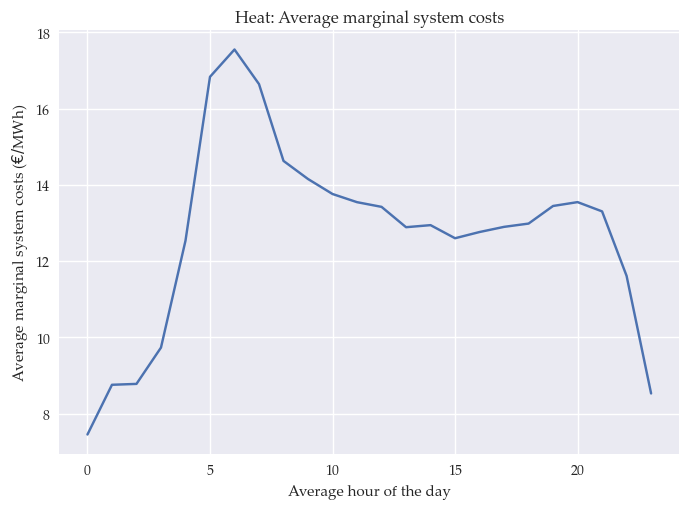

In [16]:
# Save as df
marginalSystemCosts_H_df = base_db['marginalSystemCosts_H'].to_frame().reset_index().rename(columns={0: 'MarginalSystemCosts'})

# Add hour mapping to df
marginalSystemCosts_H_df = marginalSystemCosts_H_df.reset_index().merge(m.db['h2HourOfTheDay'].to_frame(index=False))

#tick_positions = range(0, 8761, 1000)

# Plot the subset DataFrame
marginalSystemCosts_H_df.groupby('HourOfTheDay')['MarginalSystemCosts'].mean().plot()
plt.xlabel('Average hour of the day')
plt.ylabel('Average marginal system costs ($€/$MWh)')
#plt.xticks(tick_positions, tick_positions)
plt.title('Heat: Average marginal system costs')
plt.show()

#### Marginal System Costs E

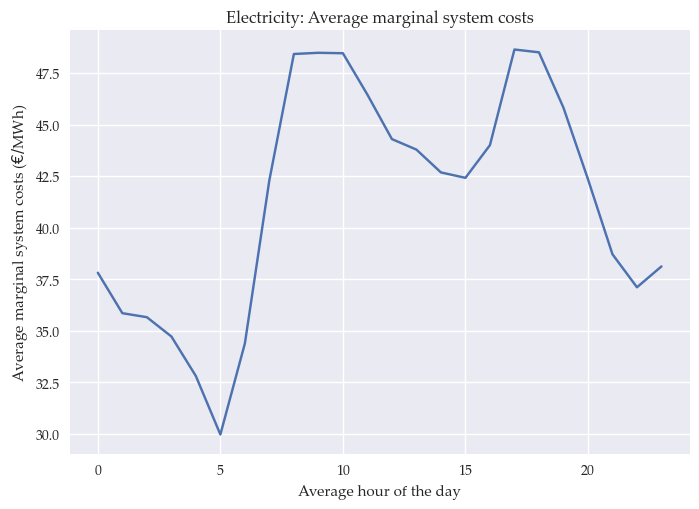

In [17]:
# Save as df
marginalSystemCosts_E_df = base_db['marginalSystemCosts_E'].to_frame().reset_index().rename(columns={0: 'MarginalSystemCosts'})

# Add hour mapping to df
marginalSystemCosts_E_df = marginalSystemCosts_E_df.reset_index().merge(m.db['h2HourOfTheDay'].to_frame(index=False))

#tick_positions = range(0, 8761, 1000)

# Plot the subset DataFrame
marginalSystemCosts_E_df.groupby('HourOfTheDay')['MarginalSystemCosts'].mean().plot()
plt.xlabel('Average hour of the day')
plt.ylabel('Average marginal system costs ($€/$MWh)')
#plt.xticks(tick_positions, tick_positions)
plt.title('Electricity: Average marginal system costs')
plt.show()

#### Storage Technology

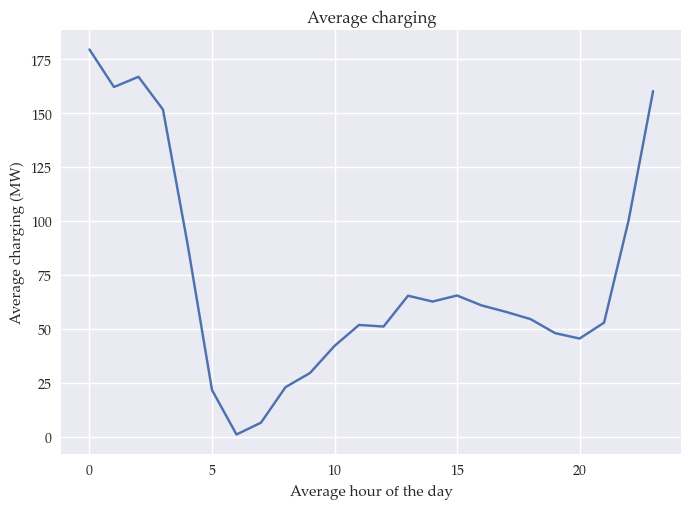

In [18]:
# Save as df
charge_df = base_db['charge_H'].to_frame().reset_index().rename(columns={0: 'charge'})

# Add hour mapping to df
charge_df = charge_df.reset_index().merge(m.db['h2HourOfTheDay'].to_frame(index=False))

#tick_positions = range(0, 8761, 1000)

# Plot the subset DataFrame
charge_df.groupby('HourOfTheDay')['charge'].mean().plot()
plt.xlabel('Average hour of the day')
plt.ylabel('Average charging (MW)')
#plt.xticks(tick_positions, tick_positions)
plt.title('Average charging')
plt.show()

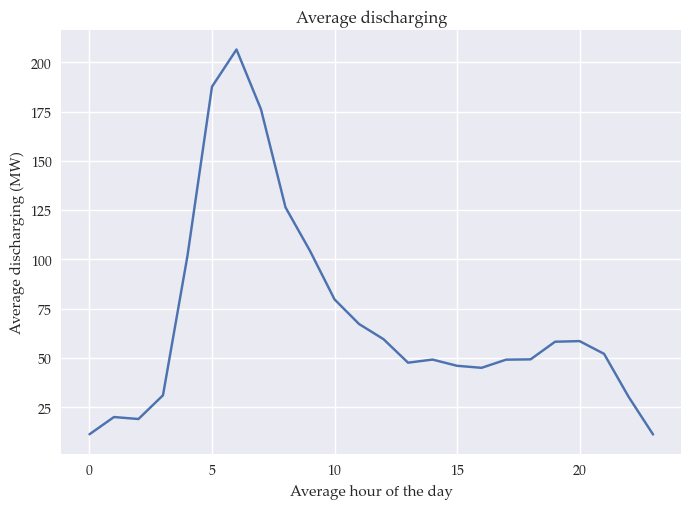

In [19]:
# Save as df
discharge_df = base_db['discharge_H'].to_frame().reset_index().rename(columns={0: 'discharge'})

# Add hour mapping to df
discharge_df = discharge_df.reset_index().merge(m.db['h2HourOfTheDay'].to_frame(index=False))

#tick_positions = range(0, 8761, 1000)

# Plot the subset DataFrame
discharge_df.groupby('HourOfTheDay')['discharge'].mean().plot()
plt.xlabel('Average hour of the day')
plt.ylabel('Average discharging (MW)')
#plt.xticks(tick_positions, tick_positions)
plt.title('Average discharging')
plt.show()

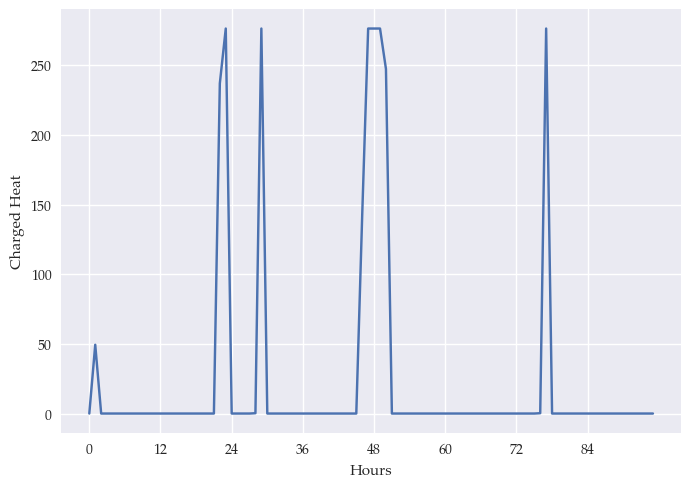

In [23]:
start_hour = 1
end_hour = 96

# For axis names
tick_positions = range(0, 96, 12)

# Filter the Series for the specified range of hours
filtered_series_charged_H = base_db['charge_H'][(base_db['charge_H'].index.get_level_values('h') >= start_hour) & (base_db['charge_H'].index.get_level_values('h') <= end_hour)]

# Plot the subset DataFrame
filtered_series_charged_H.plot()
plt.xlabel('Hours')
plt.ylabel('Charged Heat')
plt.xticks(tick_positions, tick_positions)
plt.show()

## Counterfactual Scenarios

In the following, we will run an experiment where we are exogenously increase the capacity of the storage technology from the baseline levels. We exogenously take the size of the large hot water tank recently built in Germany ([Vattenfall's press release](https://group.vattenfall.com/press-and-media/newsroom/2022/germanys-largest-heat-storage-in-the-starting-blocks)) as the maximum size of our counterfactual scenarios. The tank has a size of 56'000 $m^3$. We then exogenously insert this number in cell *C30* in the file *\EnergyEconGroupWork\DownloadDataForDK\ModelData\technology_datasheet_for_energy_storage.xlsx* in sheet *141 Large hot water tank Berlin* to get the maximum values for $GeneratingCap\_H$, $chargeCap\_H$ and $sCap$. Note that we keep the energy to heat ratio constant at 60 hours (the time it takes to fully load or deload the tank).

We will also be extracting the following variables:

In [36]:
extract = ['marginalSystemCosts_E','marginalSystemCosts_H','charge_H','discharge_H','Welfare','Emissions', 'meanConsumerPrice_E', 'meanConsumerPrice_H']

In [37]:
# Setting
#E2H = 60.344828 # The "energy storage to heat"-ratio/storage duration
#maxcap = 53.8
loop = pd.Index(range(5), name = 'loop')
v0_GCap = pd.Series(base_db['GeneratingCap_H'], index = getTechs(['HS'],m.db))
vT_GCap = pd.Series(644.7, index = v0_GCap.index)
v0_SCap = pd.Series(base_db['sCap'], index = getTechs(['HS'],m.db))
vT_SCap = pd.Series(38680, index = v0_GCap.index)

grid_GCap = adjMultiIndex.addGrid(v0_GCap,vT_GCap,loop,'GeneratingCapacity').astype(int)
grid_SCap = adjMultiIndex.addGrid(v0_SCap,vT_SCap,loop,'sCap').astype(int)

In [38]:
grid_GCap

loop  id              
0     id_DK_Central_HS    276
1     id_DK_Central_HS    368
2     id_DK_Central_HS    460
3     id_DK_Central_HS    552
4     id_DK_Central_HS    644
Name: GeneratingCapacity, dtype: int32

In [39]:
grid_SCap

loop  id              
0     id_DK_Central_HS    16575
1     id_DK_Central_HS    22101
2     id_DK_Central_HS    27627
3     id_DK_Central_HS    33153
4     id_DK_Central_HS    38680
Name: sCap, dtype: int32

We now run the counterfactual scenarios:

In [40]:
solution = m.loopSolveExtract(loop, [grid_GCap, grid_SCap], extract)

In [41]:
%%capture
loop_id=loop[[0,1,2,3,4]]

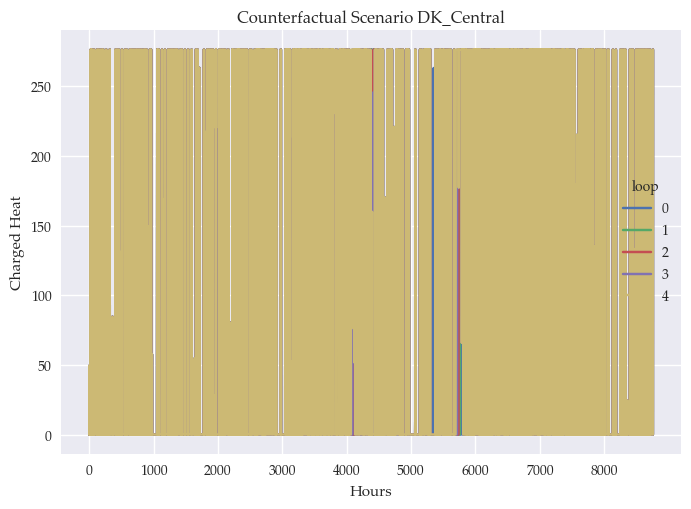

In [42]:
# Calculate tick positions for every 1000
tick_positions = range(0,  8761, 1000)

# Plot the subset Series
adj.rc_pd(solution['charge_H'],loop_id).unstack('loop').plot()
plt.xlabel('Hours')
plt.ylabel('Charged Heat')
plt.xticks(tick_positions,tick_positions)
plt.title('Counterfactual Scenario DK_Central')
plt.show()

In [ ]:
start_hour = 1
end_hour = 1000

# Filter the Series for the specified range of hours
filtered_series = solution['stored_H'][(solution['stored_H'].index.get_level_values('h') >= start_hour) & (solution['stored_H'].index.get_level_values('h') <= end_hour)]

# Calculate tick positions for every 1000
tick_positions = range(0,  1000, 100)

# Plot the subset Series
adj.rc_pd(filtered_series,loop_id).unstack('loop').plot()
plt.xlabel('Hours')
plt.ylabel('Stored Heat')
plt.xticks(tick_positions,tick_positions)
plt.title('Counterfactual Scenario DK_Central')
plt.show()